<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/Treemodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df= pd.read_csv('drive/MyDrive/DATA/Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

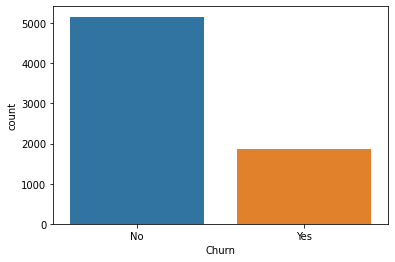

In [11]:
sns.countplot(data=df, x='Churn')

In [12]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

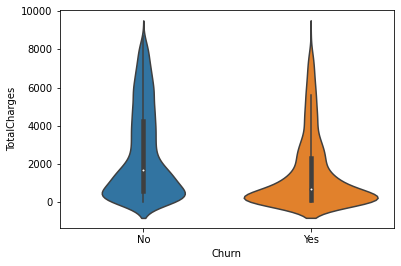

In [13]:
sns.violinplot(data=df, x='Churn', y="TotalCharges")

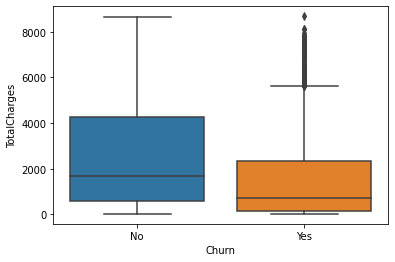

In [14]:
sns.boxplot(data=df, x='Churn', y="TotalCharges")

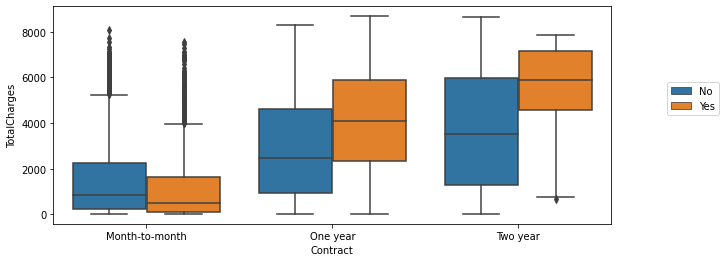

In [21]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn')
plt.legend(loc=(1.1, 0.5))

In [22]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod','Churn']]).corr()

In [28]:
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.185145,-0.182519,-0.038576,0.087539,-0.182519,0.066663,0.094403,-0.182519,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,-0.007515,0.008883,-0.007584,0.011189,-0.004745,-0.010859,-0.004745,0.016328,-0.008605,-0.004745,0.013093,0.003163,-0.004745,0.000807,-0.003815,-0.004745,0.008507,-0.003088,-0.004745,0.007124,-0.006078,-0.004745,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,0.018397,-0.142561,0.001043,-0.001235,0.000286,0.129394,0.000286,-0.143346,0.135626,0.000286,-0.141849,0.146702,0.000286,-0.153556,0.108875,0.000286,-0.120206,0.123394,0.000286,-0.124483,0.117488,0.000286,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,-0.018397,0.142561,-0.001043,0.001235,-0.000286,-0.129394,-0.000286,0.143346,-0.135626,-0.000286,0.141849,-0.146702,-0.000286,0.153556,-0.108875,-0.000286,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,-0.001078,0.024307,-0.051593,0.164101,-0.138383,0.186979,-0.138383,-0.080786,0.137421,-0.138383,-0.023639,0.128053,-0.138383,-0.013900,0.171164,-0.138383,-0.063053,0.099912,-0.138383,0.016499,0.078245,-0.138383,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,0.001078,-0.024307,0.051593,-0.164101,0.138383,-0.186979,0.138383,0.080786,-0.137421,0.138383,0.023639,-0.128053,0.138383,0.013900,-0.171164,0.138383,0.063053,-0.099912,0.138383,-0.016499,-0.078245,0.138383,-0.038375,-0.229715,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.01

In [33]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

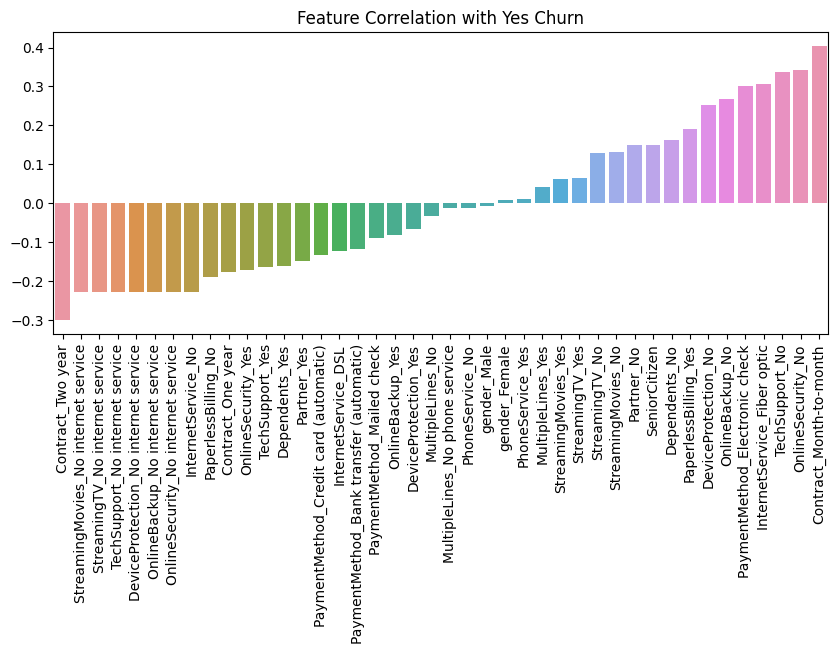

In [37]:
plt.figure(figsize=(10,4), dpi =100)
plt.title('Feature Correlation with Yes Churn')
sns.barplot(x=corr_yes_churn.index, y =corr_yes_churn.values)
plt.xticks(rotation=90)

In [40]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [41]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

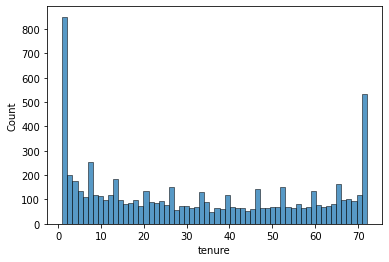

In [45]:
sns.histplot(data= df, x='tenure', bins=60)

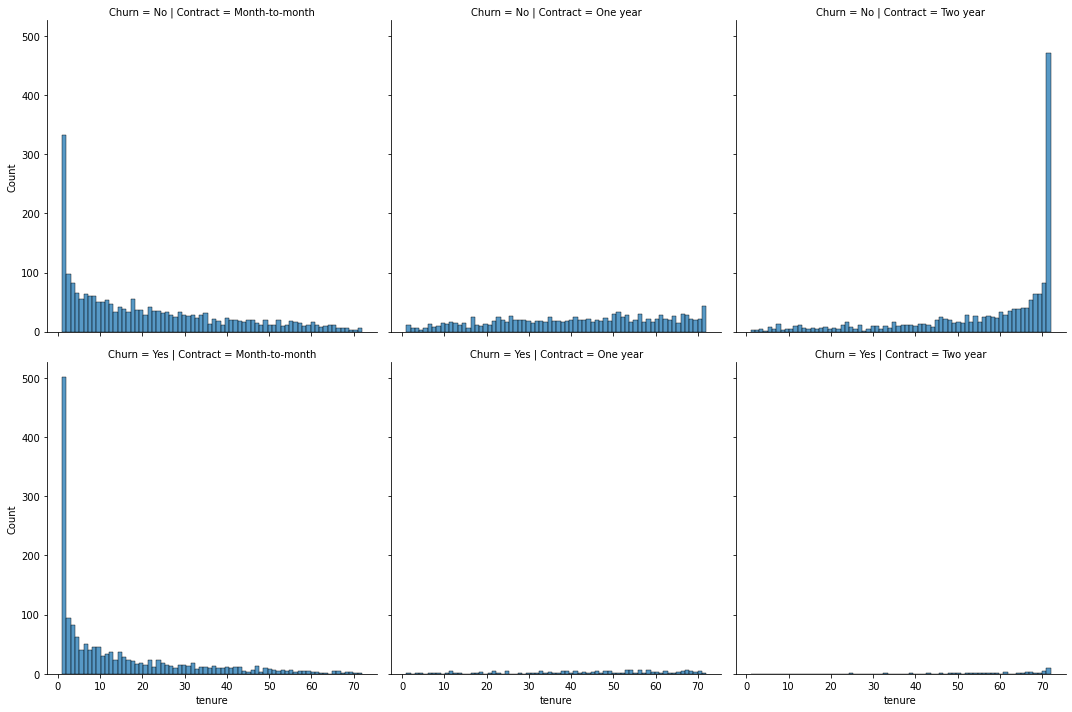

In [46]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

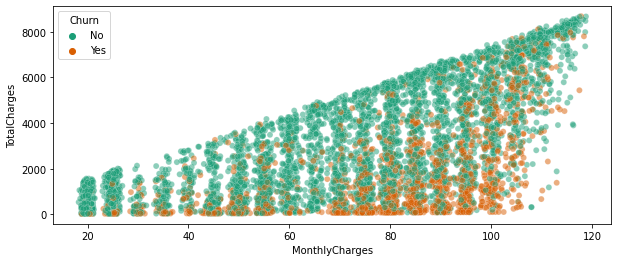

In [52]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y ="TotalCharges", hue='Churn', alpha=0.5, linewidth=0.3,
                palette ='Dark2')

In [55]:
yes_churn =df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [56]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,31,38,38,24,37,28,26,24,19,18,17,27,13,23,23,15,13,12,15,16,16,19,14,12,15,10,15,13,14,13,14,14,15,6,6,12,14,9,15,10,8,8,14,13,9,10,8,11,8,6,8,5,4,4,9,13,10,9,8,11,6,6


In [57]:
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']

In [58]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356


In [60]:
churn_rate=100*yes_churn/(no_churn+yes_churn)

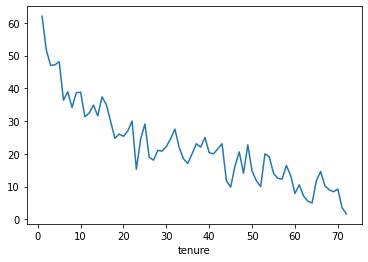

In [64]:
churn_rate.transpose()['customerID'].plot()

In [65]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'  
    else:
        return 'Over 48 Months'  

In [66]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [68]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


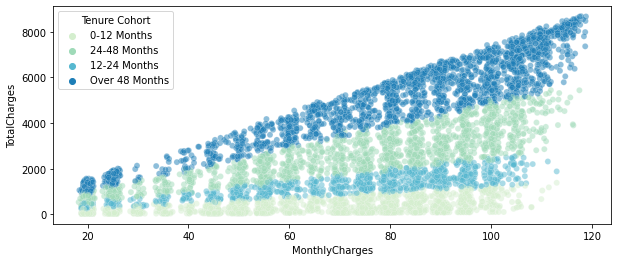

In [71]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y ="TotalCharges", hue='Tenure Cohort', alpha=0.5, linewidth=0.3,
                palette ='GnBu')

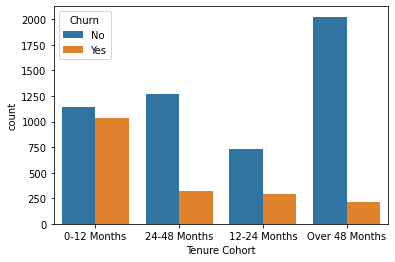

In [72]:
sns.countplot(data=df, x ='Tenure Cohort', hue ='Churn')

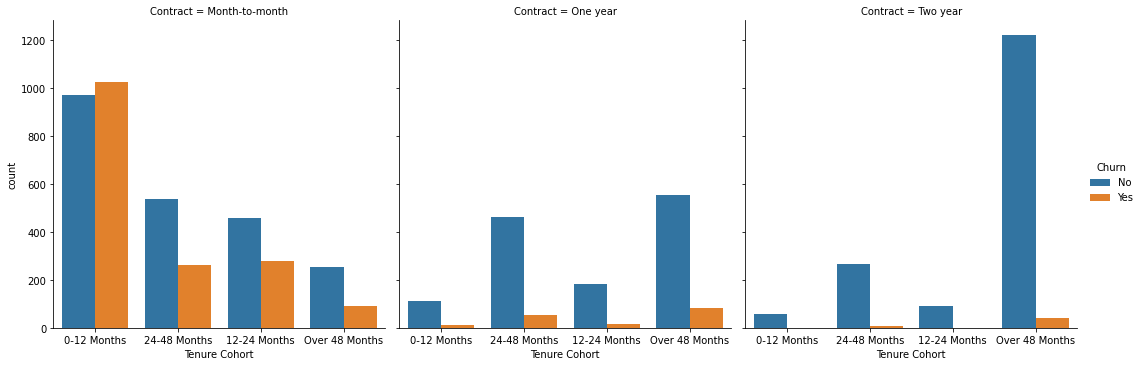

In [74]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col ='Contract')

In [76]:
X = df.drop(['Churn','customerID'], axis=1)

In [77]:
X= pd.get_dummies(X, drop_first=True)

In [78]:
y= df['Churn']

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=101)


In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt =DecisionTreeClassifier(max_depth =6,)

In [85]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [88]:
preds =dt.predict(X_test)

In [89]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



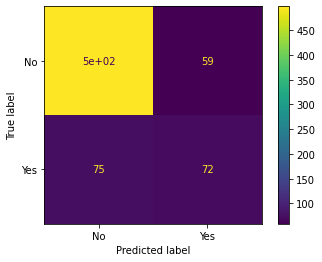

In [91]:
plot_confusion_matrix(dt, X_test, y_test)

In [94]:
imp_feat = pd.DataFrame(data =dt.feature_importances_,
                        index=X.columns,
                        columns=['Feat Imp'])

In [95]:
imp_feat

,Feat Imp
SeniorCitizen,0.010825
tenure,0.423914
MonthlyCharges,0.046777
TotalCharges,0.063506
gender_Male,0.001237
Partner_Yes,0.000000
Dependents_Yes,0.000000
PhoneService_Yes,0.000000
MultipleLines_No phone service,0.007852
MultipleLines_Yes,0.012432


In [99]:
imp_feats = imp_feat.sort_values('Feat Imp')

In [100]:
imp_feats =imp_feats[imp_feats['Feat Imp']>0]

In [101]:
imp_feats

,Feat Imp
gender_Male,0.001237
OnlineBackup_Yes,0.005341
MultipleLines_No phone service,0.007852
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
SeniorCitizen,0.010825
MultipleLines_Yes,0.012432
TechSupport_No internet service,0.026290
Contract_Two year,0.027065


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

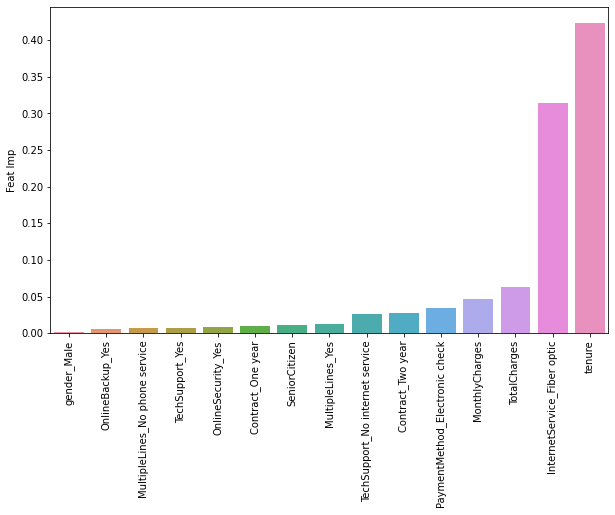

In [105]:
plt.figure(figsize=(10,6))
sns.barplot(data =imp_feats, x= imp_feats.index, y='Feat Imp')
plt.xticks(rotation =90)

In [107]:
from sklearn.tree import  plot_tree

In [ ]:
#plot_tree(dt)

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier(max_depth =6)

In [123]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
preds= rf.predict(X_test)

In [125]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.62      0.45      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



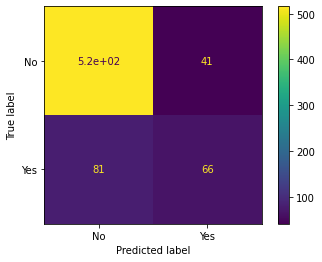

In [126]:
plot_confusion_matrix(rf, X_test, y_test)

In [127]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [128]:
ada_model =AdaBoostClassifier()

In [129]:
gb_model= GradientBoostingClassifier()

In [131]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [132]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [133]:
ada_preds = ada_model.predict(X_test)

In [134]:
gb_preds = gb_model.predict(X_test)

In [135]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [136]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704

